### Example 2 - Multiple minima vs Initial guess & Advanced functions
##### $$g(x) = x^4 - 4x^2 + 5 $$

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# make some data
x_2 = np.linspace(start=-2, stop=2, num = 1000)
x_2

# Challenge: Write the g(x) function and the dg(x) function in python

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x



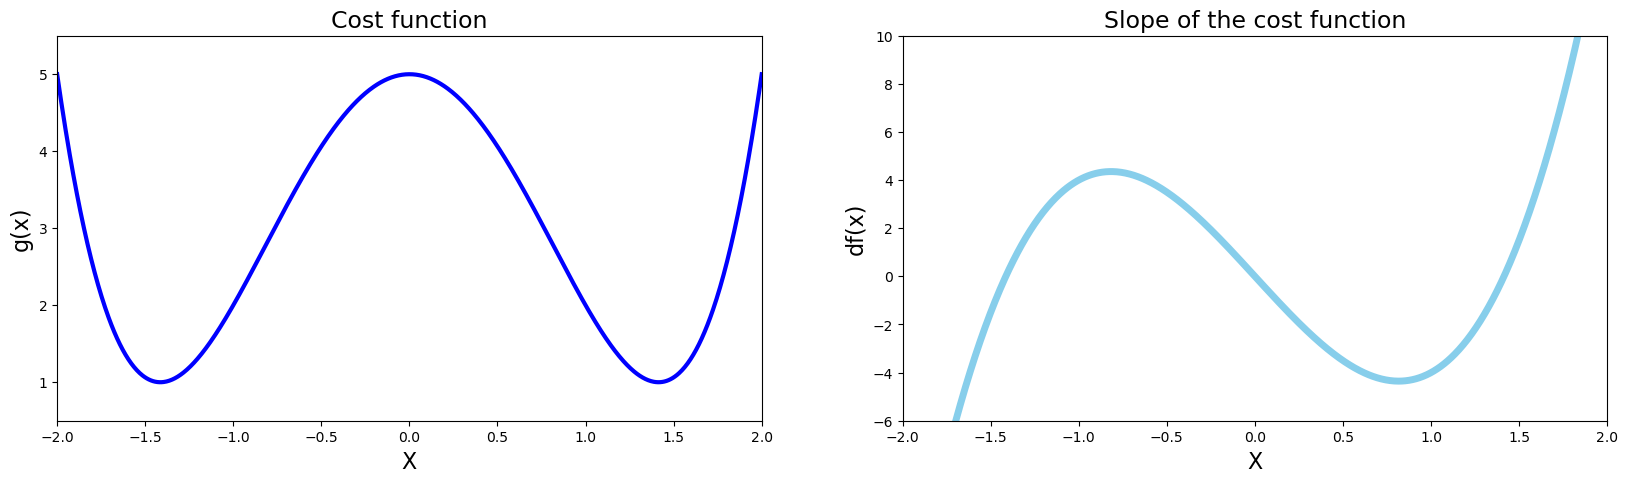

In [46]:
plt.figure(figsize = [20,5])

# Ploting g(x) Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3)


# plotting dg(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 10)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)

plt.show()

### Gradient descent as a python function

In [43]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            print(f"Loop runs {n} times")
            break
    return new_x, x_list, slope_list 


In [48]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))

Loop runs 21 times
Local min occurs at: 1.4122375085019094
Number of steps: 23


In [49]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.02, precision=0.001)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))

Loop runs 21 times
Local min occurs at: -1.4122375085019094
Number of steps: 23


In [50]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))

Loop runs 32 times
Local min occurs at: -1.4120887490901561
Number of steps: 34


Loop runs 0 times


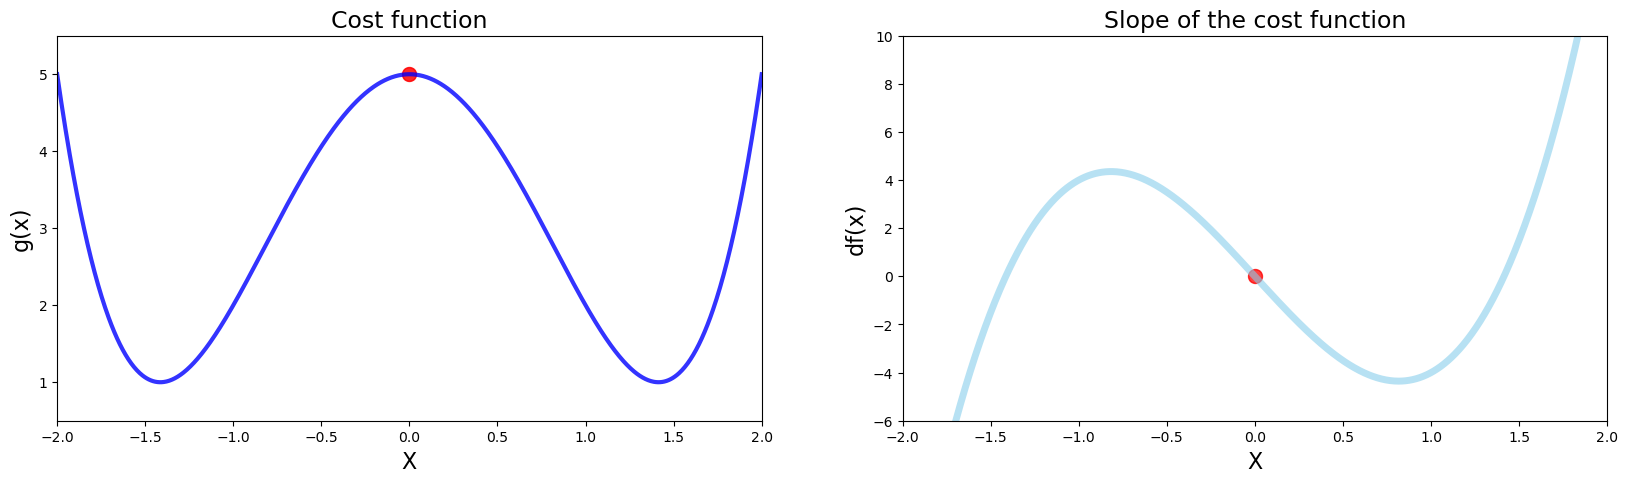

In [56]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess = 0)

# plot function and derivative and scatter plot side by side

plt.figure(figsize = [20,5])

# Ploting g(x) Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

# plotting dg(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 10)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)

plt.show()